Rahmanda Afebrio Yuris Soesatyo - Chapter 7-9, Ensemble learning and Random Forest

1. Konsep Dasar: The Wisdom of the Crowd

Inti dari Ensemble Learning adalah menggabungkan hasil prediksi dari beberapa model sekaligus supaya performanya lebih bagus dibandingkan pakai satu model saja.
Kumpulan model yang digabung ini disebut ensemble, dengan harapan “keroyokan” prediksi bisa saling nutupin kelemahan masing-masing model.

2. Voting Classifiers

Salah satu cara paling simpel bikin ensemble adalah dengan melatih beberapa model yang berbeda (misalnya Logistic Regression, SVM, dan Random Forest), lalu menggabungkan hasil prediksinya:

Hard Voting
Kelas yang paling banyak dipilih oleh model-model individual akan jadi hasil akhir.

Soft Voting
Kalau semua model bisa ngeluarin probabilitas kelas, probabilitasnya dirata-ratakan, lalu dipilih yang paling besar.
Metode ini biasanya lebih akurat karena model yang lebih “yakin” punya pengaruh lebih besar.

3. Bagging dan Pasting

Pendekatan lain adalah menggunakan algoritma yang sama, tapi tiap model dilatih dengan subset data training yang berbeda secara acak:

Bagging (Bootstrap Aggregating)
Data diambil secara acak dengan pengembalian, jadi satu data bisa muncul lebih dari sekali dalam satu subset.

Pasting
Data diambil secara acak tanpa pengembalian, sehingga tiap data hanya muncul satu kali dalam satu subset.

Out-of-Bag (OOB) Evaluation
Pada Bagging, sekitar 37% data tidak ikut dipakai saat pelatihan. Data ini bisa dimanfaatkan langsung untuk evaluasi model tanpa perlu dataset uji terpisah.

4. Random Forest

Random Forest adalah kumpulan Decision Tree yang dilatih menggunakan teknik bagging.
Selain itu, ada unsur keacakan tambahan saat membangun pohon:

Di setiap node, pemilihan fitur terbaik hanya dilakukan dari subset fitur yang dipilih secara acak, bukan dari semua fitur.

Keunggulan utama Random Forest adalah stabil dan tahan terhadap overfitting.
Selain itu, Random Forest juga bisa menghitung feature importance, yaitu seberapa besar pengaruh tiap fitur terhadap hasil prediksi—berguna banget buat analisis data.

5. Boosting

Berbeda dari bagging, boosting melatih model secara berurutan, di mana setiap model baru berusaha memperbaiki kesalahan model sebelumnya:

AdaBoost (Adaptive Boosting)
Model selanjutnya lebih fokus ke data yang sebelumnya salah diklasifikasikan, dengan cara menaikkan bobot data yang sulit.

Gradient Boosting
Alih-alih mengubah bobot data, model baru dilatih untuk memprediksi residual error, yaitu selisih antara prediksi sebelumnya dan nilai sebenarnya.

6. Stacking (Stacked Generalization)

Stacking punya pendekatan yang beda dari voting.
Metode ini melibatkan satu model tambahan yang disebut meta-learner atau blender, yang tugasnya mempelajari cara terbaik mengombinasikan output dari semua model individual agar hasil akhirnya optimal

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Menghasilkan data bulan (moons dataset)
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 2. Inisialisasi beberapa model berbeda
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

# 3. Membuat Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)

# 4. Evaluasi performa masing-masing
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{clf.__class__.__name__}: {accuracy_score(y_test, y_pred):.4f}")


LogisticRegression: 0.8640
RandomForestClassifier: 0.8960
SVC: 0.8960
VotingClassifier: 0.9200


8. Analisis Kepentingan Fitur (Feature Importance)

Salah satu keunggulan utama Random Forest adalah kemampuannya untuk menilai seberapa besar peran tiap fitur dalam proses pengambilan keputusan model.

Mekanisme Kerja:
Scikit-Learn menghitung seberapa sering dan seberapa besar sebuah fitur digunakan untuk menurunkan tingkat impurity (ketidakmurnian) pada node-node decision tree di seluruh hutan.

Manfaatnya:

Sangat membantu dalam proses feature selection

Fitur yang nilainya mendekati nol bisa dihilangkan untuk:

Menyederhanakan model

Mempercepat waktu training

Mengurangi risiko overfitting

Chapter 8: Dimensionality Reduction
1. The Curse of Dimensionality

Dalam banyak kasus, dataset punya terlalu banyak fitur yang sebenarnya tidak terlalu informatif atau saling tumpang tindih.
Semakin tinggi jumlah dimensi, jarak antar titik data jadi semakin renggang, yang berdampak pada:

Proses training yang makin lambat

Risiko overfitting yang tinggi, karena model justru belajar dari noise di ruang berdimensi tinggi

2. Pendekatan Utama Reduksi Dimensi

Ada dua strategi utama untuk mengurangi jumlah fitur:

a. Projection (Proyeksi)
Data dari ruang berdimensi tinggi (misalnya 3D) dipetakan ke ruang berdimensi lebih rendah (misalnya 2D).
Metode paling umum untuk pendekatan ini adalah PCA (Principal Component Analysis).

b. Manifold Learning
Digunakan ketika data memiliki struktur non-linear atau seperti “tergulung” (contohnya Swiss Roll).
Pendekatan ini berusaha mempertahankan struktur asli data dengan cara “membuka” bentuk tersebut, karena proyeksi linear biasa bisa merusak pola datanya.

3. Principal Component Analysis (PCA)

PCA merupakan algoritma reduksi dimensi yang paling sering digunakan. Prinsip kerjanya:

Menentukan bidang (hyperplane) yang paling mendekati sebaran data

Memproyeksikan data ke bidang tersebut dengan tetap menjaga varians sebesar mungkin

Komponen Utama (Principal Components):

PC1 adalah sumbu yang menyimpan varians data paling besar

Komponen berikutnya menyimpan sisa varians secara berurutan

4. Menentukan Jumlah Dimensi yang Optimal

Daripada asal menentukan jumlah dimensi, lebih baik memilih jumlah komponen yang mampu mempertahankan sebagian besar informasi data, misalnya 95% dari total varians.

5. Incremental PCA (IPCA)

PCA standar mengharuskan seluruh dataset dimuat ke dalam memori, yang bisa jadi masalah untuk data berukuran besar.

Solusinya adalah Incremental PCA (IPCA):

Data diproses dalam batch kecil

Dilakukan secara bertahap

Lebih hemat memori tanpa mengorbankan informasi utama

6. LLE (Locally Linear Embedding)

LLE adalah salah satu metode Manifold Learning yang efektif untuk data non-linear. Cara kerjanya:

Menganalisis hubungan setiap data dengan tetangga terdekatnya

Mencari representasi berdimensi rendah yang tetap mempertahankan hubungan lokal tersebut

Metode ini cocok untuk dataset dengan pola kompleks dan struktur non-linear.

Explained Variance Ratio: [0.40782396 0.3020019 ]
Total Varians Terjaga: 0.71


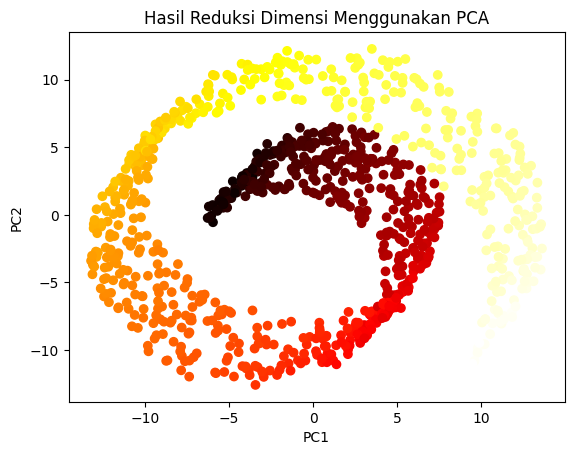

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_swiss_roll

# 1. Menghasilkan data simulasi (Swiss Roll)
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# 2. Menggunakan PCA untuk mengurangi dari 3D ke 2D
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

# 3. Melihat rasio varians yang dipertahankan
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Varians Terjaga: {np.sum(pca.explained_variance_ratio_):.2f}")

# 4. Visualisasi hasil (Opsional)
import matplotlib.pyplot as plt
plt.scatter(X2D[:, 0], X2D[:, 1], c=t, cmap=plt.cm.hot)
plt.title("Hasil Reduksi Dimensi Menggunakan PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

8. Analisis Hasil: Kenapa PCA Tidak Cocok untuk Swiss Roll?

Kalau dilihat dari visualisasi, titik-titik data yang seharusnya tersusun berurutan (kayak gradasi warna pelangi) malah terlihat saling tumpang tindih dan bercampur.

Penyebab Utama: PCA adalah metode linear.

PCA memproyeksikan data ke bidang datar

Sementara Swiss Roll punya struktur data yang melengkung dan tergulung

Proyeksi linear ini ibarat “ngepres kue gulung pakai silinder”
→ semua lapisan yang tadinya terpisah jadi remuk dan tercampur

Solusinya: Gunakan teknik Manifold Learning seperti LLE (Locally Linear Embedding) atau t-SNE.

Metode ini berusaha “membuka gulungan” data

Struktur asli data tetap terjaga meskipun dimensinya diturunkan

9. Menentukan Jumlah Dimensi yang Paling Pas (Elbow Method)

Di dunia nyata, jumlah dimensi yang dipakai sebaiknya tidak dipilih secara asal.

Langkah-langkahnya:

Buat grafik akumulasi varians dari komponen utama PCA

Cari titik “siku” (elbow) pada grafik

Titik ini menunjukkan saat penambahan dimensi sudah tidak memberi peningkatan varians yang signifikan
→ itulah jumlah dimensi yang dianggap optimal

Chapter 9: Teknik Unsupervised Learning

Di chapter sebelumnya, model selalu punya label atau jawaban benar (misalnya harga rumah atau jenis bunga).
Pada Chapter 9, kita bekerja dengan data tanpa label, sehingga algoritma harus menemukan pola atau struktur sendiri dari data tersebut.

1. Clustering (Pengelompokan)

Tujuan clustering adalah mengelompokkan data yang mirip ke dalam cluster yang sama.

A. K-Means

K-Means bekerja dengan mencari pusat cluster (centroid) secara berulang:

Menentukan centroid awal secara acak

Mengelompokkan data ke centroid terdekat

Menghitung ulang posisi centroid sebagai rata-rata data di cluster

Proses diulang sampai centroid stabil

Kekurangan K-Means:

Harus menentukan jumlah cluster (k) dari awal

Sensitif terhadap inisialisasi centroid yang buruk
→ biasanya diatasi dengan K-Means++

B. Menentukan Jumlah Cluster yang Tepat

Beberapa metode yang sering dipakai:

Elbow Method
Memvisualisasikan nilai inertia (rata-rata jarak kuadrat data ke centroid).
Pilih titik saat penurunan inertia mulai melambat tajam.

Silhouette Score
Mengukur seberapa dekat sebuah data dengan clusternya sendiri dibanding cluster lain:

+1 → clustering sangat baik

0 → berada di batas antar cluster

−1 → kemungkinan salah cluster

C. DBSCAN

DBSCAN membentuk cluster berdasarkan kepadatan data:

Tidak perlu menentukan jumlah cluster di awal

Mampu menangani cluster dengan bentuk tidak beraturan

Bisa mendeteksi outlier secara otomatis

2. Gaussian Mixture Model (GMM)

GMM adalah model probabilistik yang menganggap data berasal dari campuran beberapa distribusi Gaussian.

Keunggulannya:

Lebih fleksibel dibanding K-Means

Bisa menangani cluster berbentuk lonjong atau oval

Memberikan probabilitas keanggotaan data pada tiap cluster, bukan sekadar label keras

3. Anomaly Detection (Deteksi Anomali)

Anomaly detection digunakan untuk menemukan data yang tidak biasa atau menyimpang, contohnya transaksi kartu kredit yang mencurigakan.

Beberapa metode yang umum dipakai:

Gaussian Mixture Model

Isolation Forest

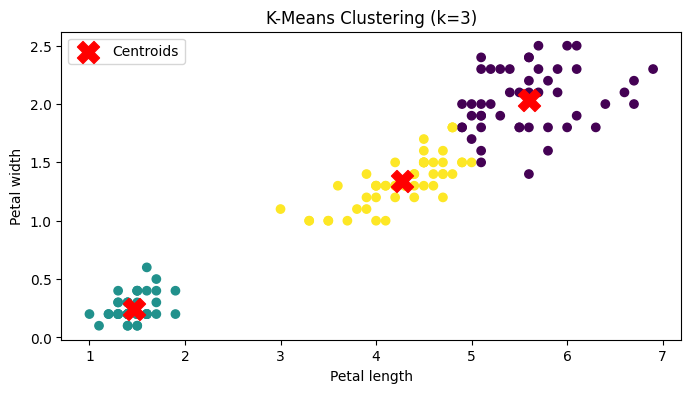

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 1. Load data (Tanpa menggunakan label y)
iris = load_iris()
X = iris.data[:, 2:] # petal length and width

# 2. Melatih K-Means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

# 3. Visualisasi Cluster dan Centroids
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=250, marker='X', c='red', label='Centroids')
plt.title(f"K-Means Clustering (k={k})")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

5. Menentukan Jumlah Cluster Optimal
Dalam dunia nyata, seringkali kita tidak tahu berapa jumlah cluster.
Ada dua metode utama untuk menentukan jumlah cluster:

A. Metode Elbow (Inertia)
Memplot Inertia: jumlah kuadrat jarak antara sampel dan centroid terdekatnya
Saat
 bertambah, inersia akan turun
Cari titik "siku" (elbow) di mana penurunan inersia tidak lagi drastis

B. Silhouette Analysis
Mengukur seberapa baik setiap sampel pas di clusternya
Interpretasi skor:
+1 → Sampel jauh dari cluster tetangga (bagus)
0 → Sampel berada di ambang batas antara dua cluster
-1 → Sampel kemungkinan besar berada di cluster yang salah
6. Penggunaan Clustering untuk Preprocessing
Clustering tidak hanya untuk analisis data, tapi bisa digunakan sebagai langkah awal sebelum algoritma lain:

Dimensionality Reduction:

Ganti fitur asli dengan jarak sampel ke setiap centroid
Semi-supervised Learning:

Jika punya banyak data tanpa label dan sedikit data berlabel
Lakukan clustering lalu sebarkan label dari sampel berlabel ke seluruh anggota cluster yang sama (Label Spreading)